### lecture 2： Bellman Equation

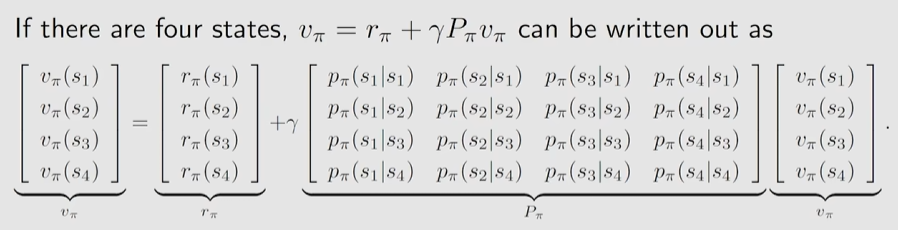

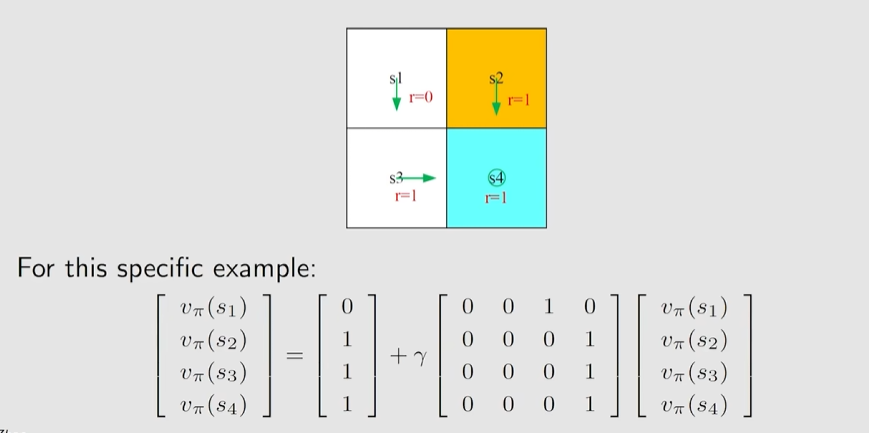

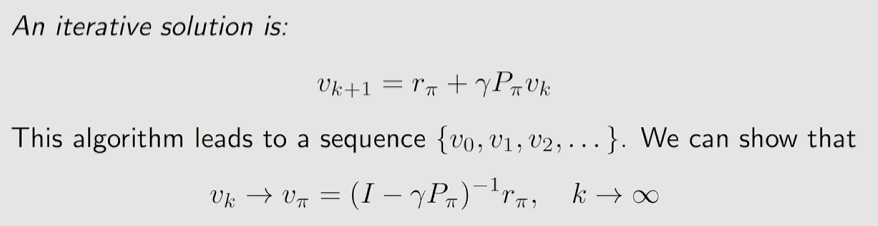

#### Example 1
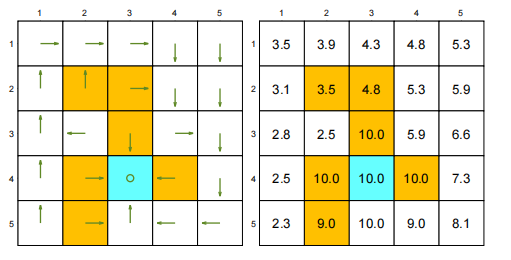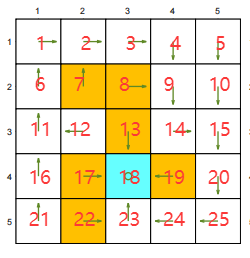

In [1]:
import numpy as np
from bellman_equation import draw_grid, draw_grid_animation


In [2]:
PI_Ex1 = [
    ['right', 'right', 'right', 'down', 'down'],
    ['up', 'up', 'right', 'down', 'down'],
    ['up', 'left', 'down', 'right', 'down'],
    ['up', 'right', None, 'left', 'down'],
    ['up', 'right', 'up', 'left', 'left']
]
r_PI_Ex1 = [
    0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0,
    0, 0, 1, 0, 0,
    0, 1, 1, 1, 0,
    0, 0, 1, 0, 0
] 
P_PI = [
   # 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s2|s1) = 1
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s3|s2) = 1
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s4|s3) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s9|s4) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s10|s5) = 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s1|s6) = 1
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s2|s7) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s9|s8) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s14|s9) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s15|s10) = 1
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s6|s11) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s11|s12) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # p(s18|s13) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s15|s14) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], # p(s20|s15) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s11|s16) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # p(s18|s17) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # p(s18|s18) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # p(s18|s19) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # p(s25|s20) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], # p(s16|s21) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # p(s23|s22) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # p(s18|s23) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # p(s23|s24) = 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] # p(s24|s25) = 1
]

r_PI_Ex1 = np.array(r_PI_Ex1)
P_PI = np.array(P_PI)
print(r_PI_Ex1.shape, P_PI.shape)

(25,) (25, 25)


In [3]:
v = np.zeros(25)
for i in range(100):
    v = r_PI_Ex1 + 0.9 * P_PI.dot(v)

for i in range(5):
    for j in range(5):
        print(f"{v[i*5+j]:.1f}", end=' ')
    print()

3.5 3.9 4.3 4.8 5.3 
3.1 3.5 4.8 5.3 5.9 
2.8 2.5 10.0 5.9 6.6 
2.5 10.0 10.0 10.0 7.3 
2.3 9.0 10.0 9.0 8.1 


易知：  
当策略 $\pi \in R^{n \times n}$ 给定，可以根据它得到总的 `state` 数量为 `n*n`。  
若环境给定：
- forbidden area, target area 确定
- 每个 area 的 reward 确定  

则可以根据策略 $\pi$ 确定 immediate reward 向量 $r_\pi$ 和 状态转移概率矩阵 $P_\pi$  
其中 $r_\pi$ 中第 `i` 个元素为 `n*n` 中第 `i` 个 `state` ，根据 $\pi$ 转移到下一个 `state`时会得到的reward  

> 根据当前状态和动作，判断下一个状态。  
> if next_state in targets: reward = 1 else reward = 0  
> if next_state in forbiddens: reward = -1 else reward = 0  
> else reward = 0  

In [4]:
# 根据策略PI构建奖励向量r_PI，
# PI: 策略矩阵，n x n 大小，每个元素为 'up' | 'down' | 'left' | 'right' | None
# r_PI: 共n*n种策略，故奖励向量大小为 n*n
# 注意 forbiddens 和 targets 中的坐标是从 (1,1) 开始计数的
def get_r_PI_from_PI(PI, forbiddens, targets):
    if len(PI) < 1:
        raise ValueError("PI must be a non-empty matrix")
    
    n = len(PI) ** 2 # 状态数量 n*n
    r_PI = np.zeros(n) 

    # 根据当前状态和动作，判断下一个状态。
    # if next_state in targets: reward = 1 else reward = 0
    # if next_state in forbiddens: reward = -1 else reward = 0
    # if next_state is out of boundary: reward = -1
    # else reward = 0
    for i in range(len(PI)): # i 代表 y 轴
        for j in range(len(PI[0])): # j 代表 x 轴
            # 第 i * len(PI) + j 个状态， 即r_PI中的第 i * n + j 个元素
            idx = i * len(PI) + j
            action = PI[i][j]
            next_i, next_j = i, j
            if action is None:
                pass
            elif action == 'right':
                next_j += 1        
            elif action == 'left':
                next_j -= 1 
            elif action == 'up':
                next_i -= 1 
            elif action == 'down':
                next_i += 1 
            else:
                raise ValueError("Invalid action in PI")

            next_state = (next_j + 1, next_i + 1) # 转换为从 (1,1) 开始计数的坐标
            if next_state in targets:
                r_PI[idx] = 1
            elif next_state in forbiddens:
                r_PI[idx] = -1
            elif next_i < 0 or next_i >= len(PI) or next_j < 0 or next_j >= len(PI[0]):
                r_PI[idx] = -1
            else:
                r_PI[idx] = 0

    return np.array(r_PI)

#### case study for `get_r_PI_from_PI`
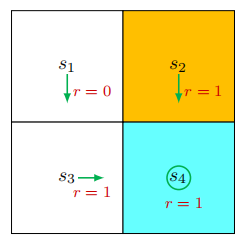

In [5]:
# case study
forbiddens_case1 = [(2,1)]
targets_case1 = [(2, 2)]
PI_case1 = [
    ['down', 'down'],
    ['right', None]
]
r_PI_case1 = get_r_PI_from_PI(PI_case1, forbiddens_case1, targets_case1)
print(r_PI_case1)

[0. 1. 1. 1.]


状态转移概率矩阵 $P_\pi$，则根据策略 $\pi$，$ p(state|next_state) = 1, p(state|other state)= 0 $

In [6]:
# 根据策略PI构建状态转移概率矩阵P_PI， 
# PI: 策略矩阵，n x n 大小，每个元素为 'up' | 'down' | 'left' | 'right' | None
# P_PI: 共n*n种策略，故状态转移概率矩阵大小为 (n*n) x (n*n)
def get_P_PI_from_PI(PI):
    if len(PI) < 1:
        raise ValueError("PI must be a non-empty matrix")
    
    n = len(PI) ** 2 # 状态数量 n*n
    P_PI = np.zeros((n, n)) 

    for i in range(len(PI)): # 行
        for j in range(len(PI[0])):  # 列
            #第 i * len(PI) + j 个状态， 即P_PI中的第 i * n + j 行
            # col = raw = i * len(PI) + j
            action = PI[i][j]
            next_i, next_j = i, j
            if action is None:
                pass
            elif action == 'right':
                next_j += 1 if next_j + 1 < len(PI[0]) else 0
            elif action == 'left':
                next_j -= 1 if next_j - 1 >= 0 else 0
            elif action == 'up':
                next_i -= 1 if next_i - 1 >= 0 else 0
            elif action == 'down':
                next_i += 1 if next_i + 1 < len(PI) else 0
            else:
                raise ValueError("Invalid action in PI")
            
            col = i * len(PI) + j
            raw = next_i * len(PI) + next_j
            P_PI[col][raw] = 1

    return np.array(P_PI)

In [7]:
P_PI_case1 = get_P_PI_from_PI(PI_case1)
print(P_PI_case1)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


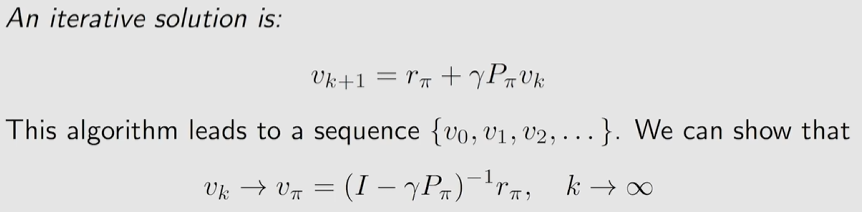

现在，针对贝尔曼方程，我们已经拥有 $P_\pi$ 和 $r_\pi$，可以通过迭代的方式求 $v$

In [8]:
# 给定策略PI, 环境forbidden area, target area, 和 迭代求解次数T, 折扣因子gamma
# 返回状态价值函数v
def iterative_solution_state_value_from_bellman(PI, forbiddens, targets, T, gamma=0.9):
    v = np.zeros(len(PI) * len(PI)) # 初始化状态价值函数向量 v, 等于state数量，即 n*n
    P_PI = get_P_PI_from_PI(PI=PI) # 根据策略PI构建状态转移概率矩阵P_PI
    r_PI = get_r_PI_from_PI(PI=PI, forbiddens=forbiddens, targets=targets) # 根据策略PI构建奖励向量r_PI

    V_list = []
    PI_list = []
    for _ in range(T):
        v = r_PI + gamma * P_PI.dot(v)
        V_list.append(v.reshape(len(PI), len(PI)).copy())
        PI_list.append(PI)

    # for i in range(len(PI)):
    #     for j in range(len(PI)):
    #         print(f"{v[i*len(PI)+j]:.1f}", end=' ')
    #     print()

    # 可视化结果（静态）
    draw_grid(n=len(PI), forbidden=forbiddens, targets=targets, PI=PI, V=v.reshape(len(PI), len(PI)))

    # 可视化结果（动态）
    # draw_grid_animation(
    #     n=len(PI),
    #     forbidden=forbiddens,
    #     targets=targets,
    #     PI_list=PI_list,
    #     V_list=V_list,
    #     interval=100
    # )

    return v

回看之前的Example 1  
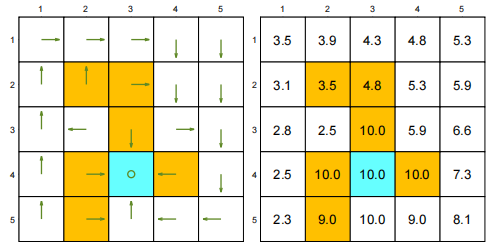

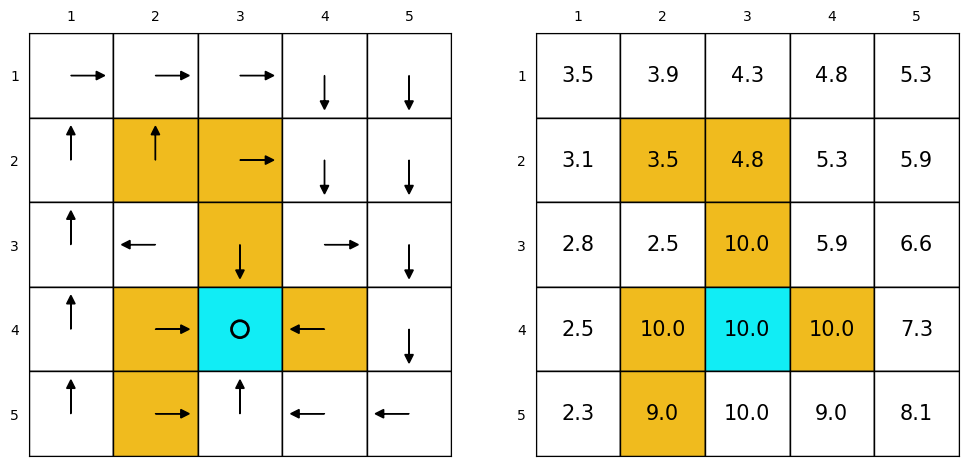

In [9]:
forbiddens_ex1 = {(2, 2), (2, 4), (2, 5), (3, 2), (3, 3), (4, 4)}
targets_ex1 = {(3, 4)}
PI_ex1 = [
    ['right', 'right', 'right', 'down', 'down'],
    ['up', 'up', 'right', 'down', 'down'],
    ['up', 'left', 'down', 'right', 'down'],
    ['up', 'right', None, 'left', 'down'],
    ['up', 'right', 'up', 'left', 'left']
]

v_ex1 = iterative_solution_state_value_from_bellman(
    PI=PI_ex1,
    forbiddens=forbiddens_ex1,
    targets=targets_ex1,
    T=100,
    gamma=0.9
)


再看 Example 2：  
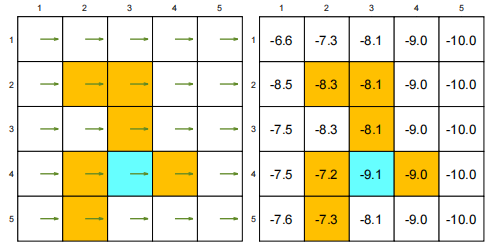


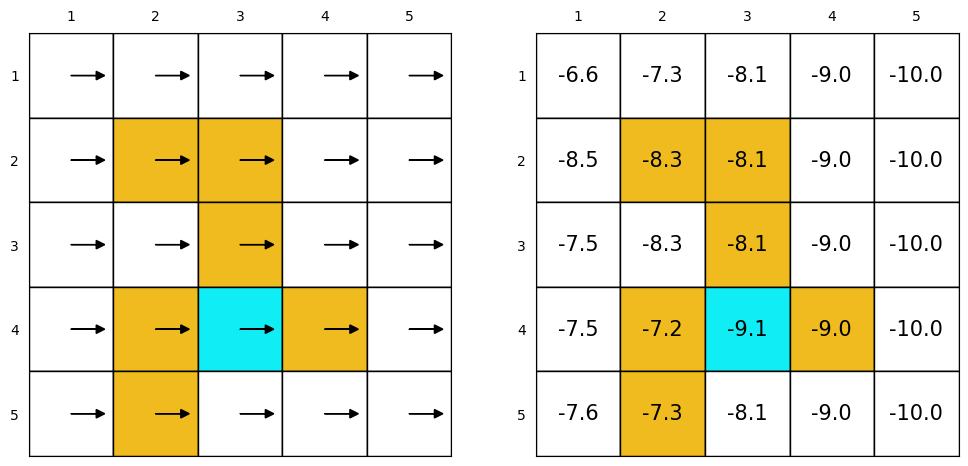

In [10]:
PI_ex2 = [
    ['right', 'right', 'right', 'right', 'right'],
    ['right', 'right', 'right', 'right', 'right'],
    ['right', 'right', 'right', 'right', 'right'],
    ['right', 'right', 'right', 'right', 'right'],
    ['right', 'right', 'right', 'right', 'right']
]

v_ex2 = iterative_solution_state_value_from_bellman(
    PI=PI_ex2,
    forbiddens=forbiddens_ex1,
    targets=targets_ex1,
    T=100,
    gamma=0.9
)

再看 Example 3：  
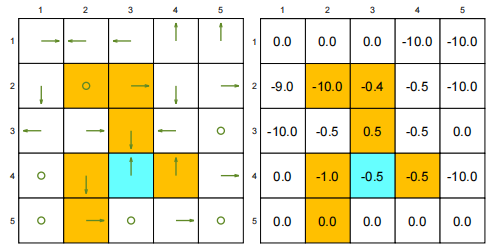

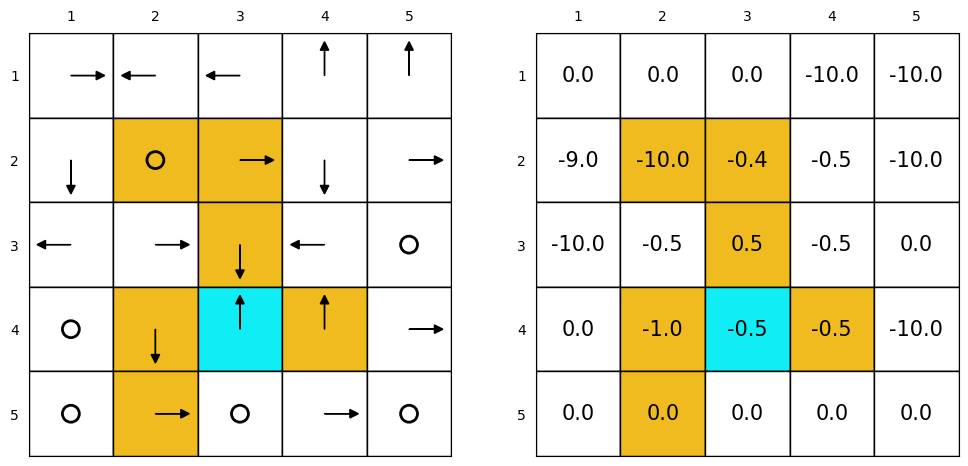

In [11]:
PI_ex3 = [
    ['right', 'left', 'left', 'up', 'up'],
    ['down', None, 'right', 'down', 'right'],
    ['left', 'right', 'down', 'left', None],
    [None, 'down', 'up', 'up', 'right'],
    [None, 'right', None, 'right', None]
]

v_ex3 = iterative_solution_state_value_from_bellman(
    PI=PI_ex3,
    forbiddens=forbiddens_ex1,
    targets=targets_ex1,
    T=100,
    gamma=0.9
)